##Importamos librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

##Cargamos el Dataset desde Github

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Biblioman09/IA/refs/heads/main/Global_AI_Content_Impact_Dataset.csv')
data

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Germany,2021,Automotive,89.44,52.98,48.47,12.14,30.60,DALL-E,Lenient,77.21,44.35
196,Germany,2020,Media,70.11,28.26,27.62,57.86,58.71,DALL-E,Strict,78.74,31.73
197,France,2023,Marketing,65.77,49.83,39.94,79.44,43.73,Synthesia,Lenient,81.58,14.62
198,Australia,2023,Automotive,45.35,20.49,33.21,50.50,41.73,Claude,Strict,47.42,43.11


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,200.0,2022.31500,1.825496,2020.00,2021.0000,2022.000,2024.0000,2025.00
AI Adoption Rate (%),200.0,54.26585,24.218067,10.53,33.2225,53.310,76.2200,94.76
AI-Generated Content Volume (TBs per year),200.0,46.07260,29.161220,1.04,20.3225,44.320,71.6200,99.06
Job Loss Due to AI (%),200.0,25.78825,13.901105,0.09,14.9950,25.735,37.4175,49.71
Revenue Increase Due to AI (%),200.0,39.71945,23.829545,0.14,17.9075,42.100,58.6975,79.55
Human-AI Collaboration Rate (%),200.0,54.10215,19.247079,20.21,37.7700,54.515,69.4025,88.29
Consumer Trust in AI (%),200.0,59.42515,17.319668,30.12,44.7550,59.215,74.8850,89.88
Market Share of AI Companies (%),200.0,26.56955,14.023729,1.18,14.0525,27.390,38.4325,49.28


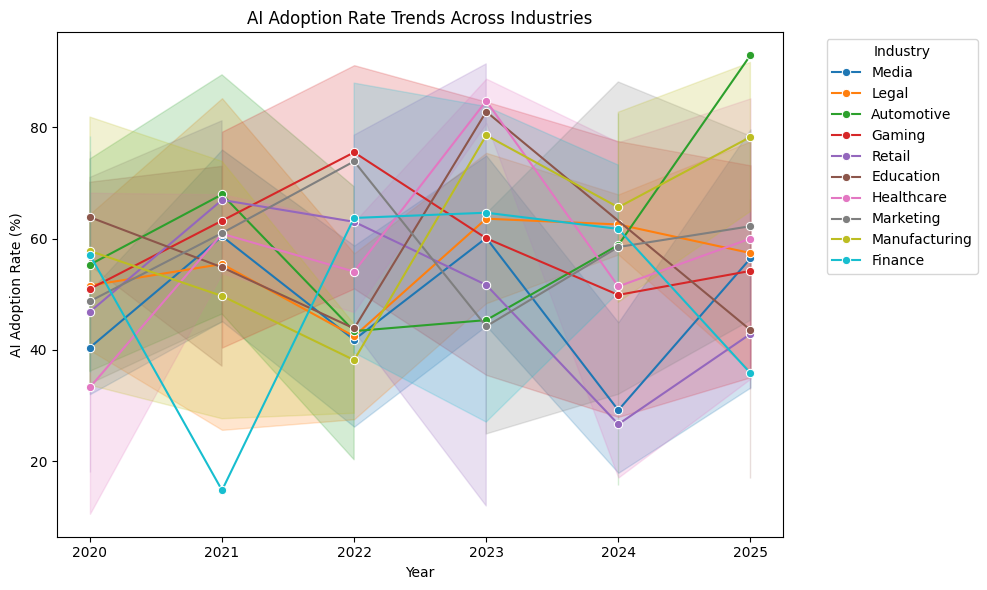

In [5]:
# Plotting AI Adoption Rate trends over time for each industry
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='AI Adoption Rate (%)', hue='Industry', marker='o')
plt.title('AI Adoption Rate Trends Across Industries')
plt.xlabel('Year')
plt.ylabel('AI Adoption Rate (%)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

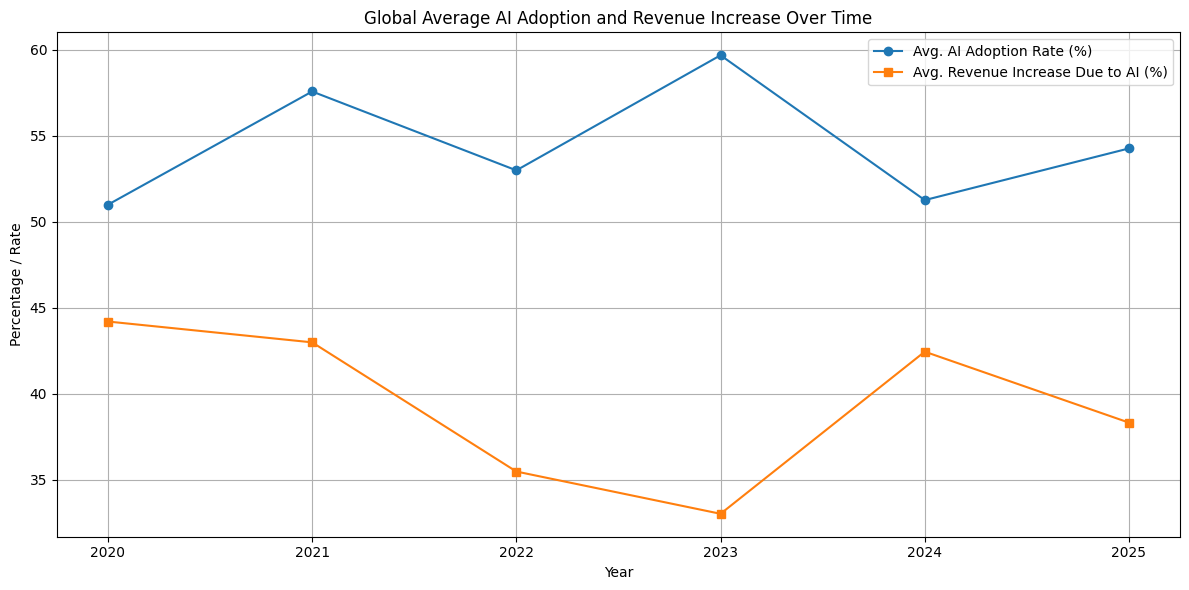

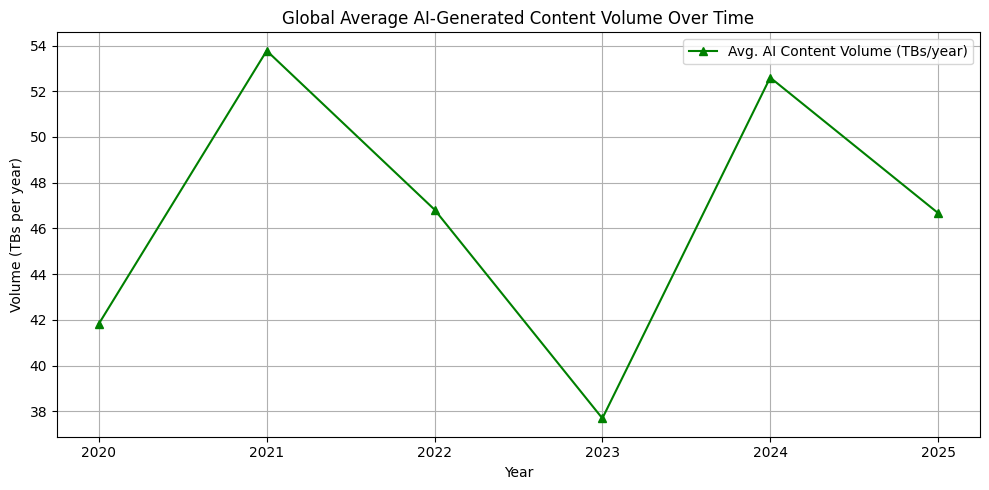

In [6]:
#  Global Average AI Adoption Rate and Revenue Increase Over Years
trends_over_time = data.groupby('Year')[['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)', 'AI-Generated Content Volume (TBs per year)']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(trends_over_time['Year'], trends_over_time['AI Adoption Rate (%)'], marker='o', label='Avg. AI Adoption Rate (%)')
plt.plot(trends_over_time['Year'], trends_over_time['Revenue Increase Due to AI (%)'], marker='s', label='Avg. Revenue Increase Due to AI (%)')
plt.title('Global Average AI Adoption and Revenue Increase Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage / Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(trends_over_time['Year'], trends_over_time['AI-Generated Content Volume (TBs per year)'], marker='^', color='green', label='Avg. AI Content Volume (TBs/year)')
plt.title('Global Average AI-Generated Content Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume (TBs per year)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Grouping data by Industry to check average job loss and revenue increase due to AI
industry_bias = data.groupby('Industry').agg({
    'Job Loss Due to AI (%)': 'mean',
    'Revenue Increase Due to AI (%)': 'mean'
}).reset_index()

print("\nPérdida promedio de empleo y aumento de ingresos por industria:")
print(industry_bias)


Pérdida promedio de empleo y aumento de ingresos por industria:
        Industry  Job Loss Due to AI (%)  Revenue Increase Due to AI (%)
0     Automotive               28.916842                       46.482632
1      Education               26.142353                       39.543529
2        Finance               27.790000                       36.257143
3         Gaming               27.204074                       33.234444
4     Healthcare               25.579412                       38.586471
5          Legal               28.234118                       41.824118
6  Manufacturing               32.746111                       42.807222
7      Marketing               19.577895                       36.813684
8          Media               22.749032                       43.719677
9         Retail               21.846667                       37.679524


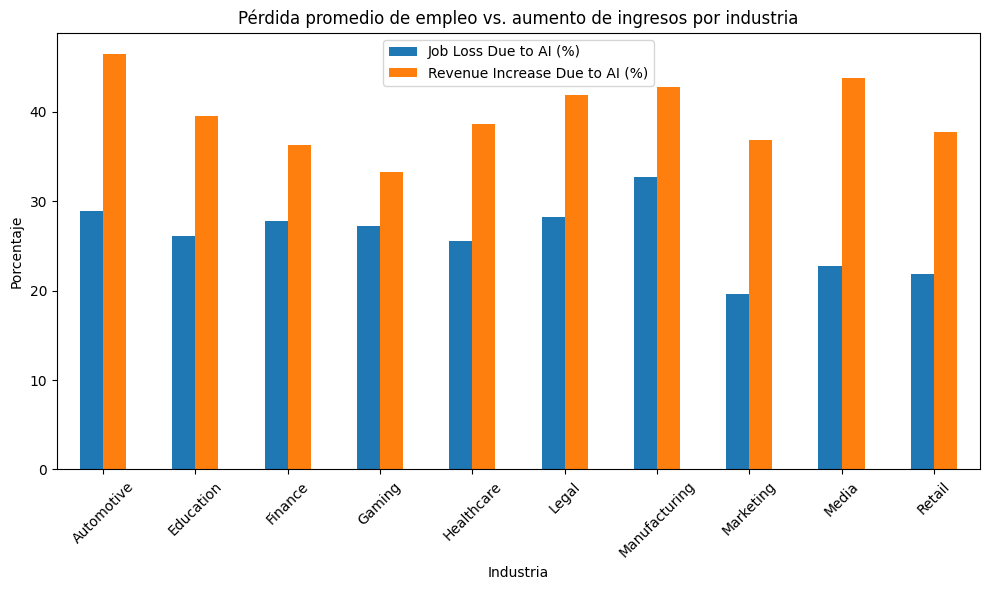

In [8]:
# Visualizing the biases side by side
industry_bias.set_index('Industry').plot(kind='bar', figsize=(10, 6))
plt.title('Pérdida promedio de empleo vs. aumento de ingresos por industria')
plt.xlabel('Industria')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

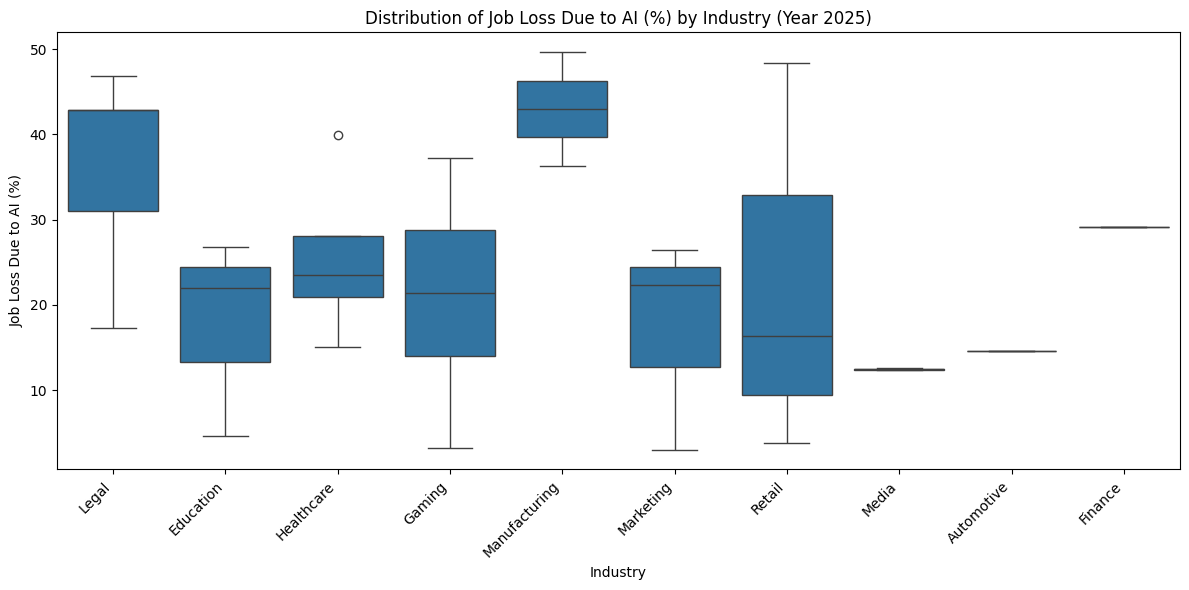

In [10]:
#Compare Job Loss Due to AI across different Industries (using latest year data if available)

latest_year = data['Year'].max()
df_latest = data[data['Year'] == latest_year]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_latest, x='Industry', y='Job Loss Due to AI (%)')
plt.title(f'Distribution of Job Loss Due to AI (%) by Industry (Year {latest_year})')
plt.xlabel('Industry')
plt.ylabel('Job Loss Due to AI (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

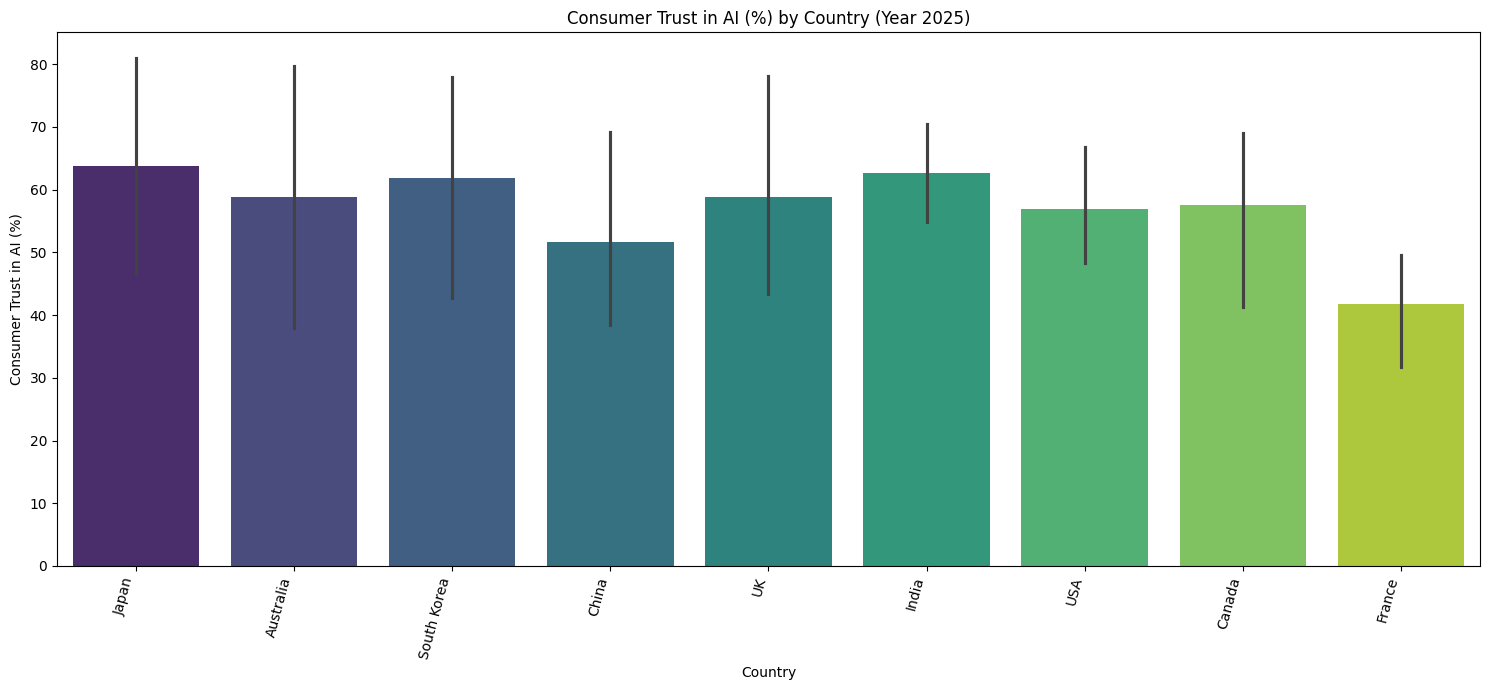

In [12]:
#Compare Consumer Trust in AI across different Countries (using latest year data)
plt.figure(figsize=(15, 7))
sns.barplot(data=df_latest.sort_values('Consumer Trust in AI (%)', ascending=False),
            x='Country', y='Consumer Trust in AI (%)', palette='viridis')
plt.title(f'Consumer Trust in AI (%) by Country (Year {latest_year})')
plt.xlabel('Country')
plt.ylabel('Consumer Trust in AI (%)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

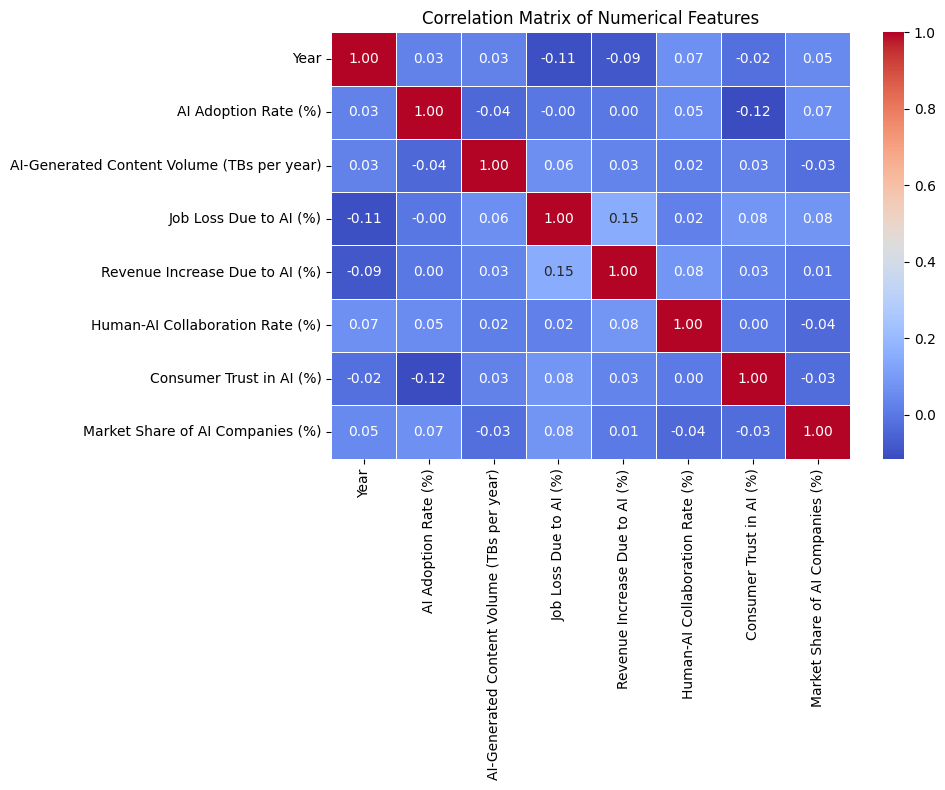

In [14]:
# Correlation Analysis (Numerical columns only)
numeric_df = data.select_dtypes(include=np.number)    #numeric features
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [15]:
# Prepare data: Global average adoption rate per year
adoption_time_series = data.groupby('Year')['AI Adoption Rate (%)'].mean().reset_index()

In [16]:
# Feature (Year) and Target (Adoption Rate)
X = adoption_time_series[['Year']]
y = adoption_time_series['AI Adoption Rate (%)']

In [17]:
# Feature (Year) and Target (Adoption Rate)
X = adoption_time_series[['Year']]
y = adoption_time_series['AI Adoption Rate (%)']

In [18]:
#split dataset
if len(adoption_time_series) > 5:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # No shuffle for time series
else:
    X_train, y_train = X, y # Use all data if too few points
    X_test, y_test = pd.DataFrame(), pd.Series() # Empty test set

In [19]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_test = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"\nLinear Regression Model Evaluation (Test Set):")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  R-squared (R2): {r2:.2f}")


Linear Regression Model Evaluation (Test Set):
  Mean Squared Error (MSE): 80.96
  R-squared (R2): -34.88


In [21]:
# Predict future adoption rates
current_year = pd.Timestamp.now().year # Use current year from system clock
future_years = pd.DataFrame({'Year': range(latest_year + 1, latest_year + 6)}) # Predict next 5 years
future_predictions_lr = lr_model.predict(future_years)

future_df_lr = pd.DataFrame({'Year': future_years['Year'], 'Predicted AI Adoption Rate (%)': future_predictions_lr})
print("\nFuture AI Adoption Rate Predictions (Linear Regression):")
print(future_df_lr)


Future AI Adoption Rate Predictions (Linear Regression):
   Year  Predicted AI Adoption Rate (%)
0  2026                       64.968814
1  2027                       67.115775
2  2028                       69.262737
3  2029                       71.409699
4  2030                       73.556660


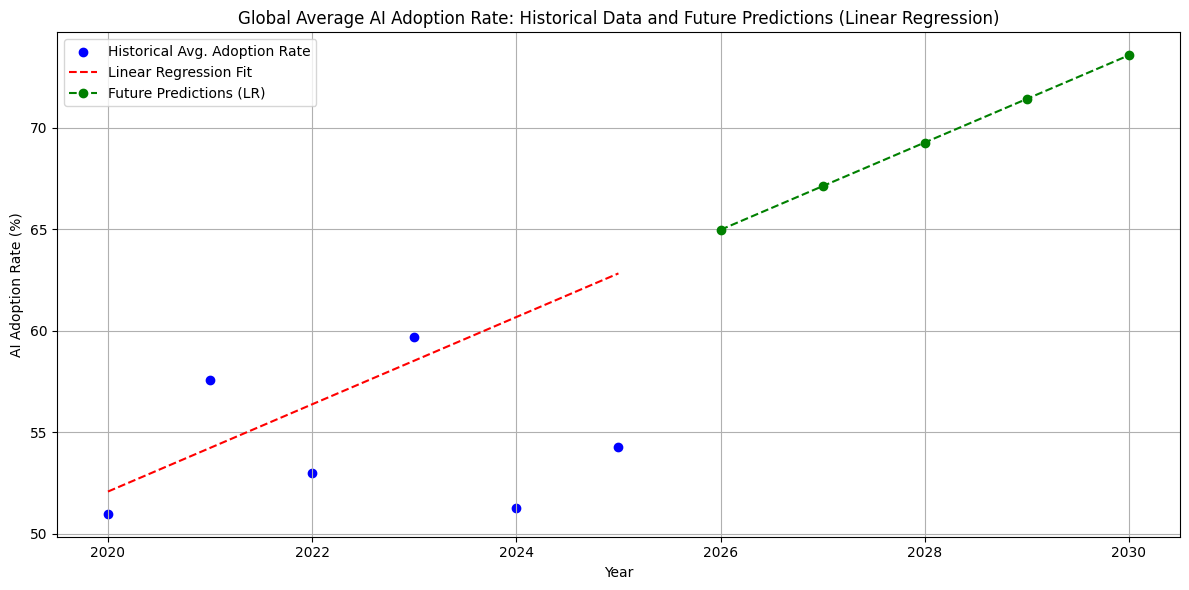

In [22]:
# Visualize historical data and predictions
plt.figure(figsize=(12, 6))
plt.scatter(X['Year'], y, color='blue', label='Historical Avg. Adoption Rate')
plt.plot(X['Year'], lr_model.predict(X), color='red', linestyle='--', label='Linear Regression Fit')
plt.plot(future_df_lr['Year'], future_df_lr['Predicted AI Adoption Rate (%)'], color='green', marker='o', linestyle='--', label='Future Predictions (LR)')
plt.title('Global Average AI Adoption Rate: Historical Data and Future Predictions (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('AI Adoption Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()